#Amazon's Top 50 Bestsellers (2009-2019)

Data Resource : https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bestsellers with categories.csv')

In [3]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [4]:
df.nunique()

Name           351
Author         248
User Rating     14
Reviews        346
Price           40
Year            11
Genre            2
dtype: int64

#Exploratory Data Analysis

In [5]:
df.sort_values('User Rating',ascending=False).head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
431,The Magnolia Story,Chip Gaines,4.9,7861,5,2016,Non Fiction
87,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,4.9,5470,6,2018,Fiction
85,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,4.9,12619,8,2019,Fiction
84,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2019,Fiction
83,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2018,Fiction
82,Dog Man: A Tale of Two Kitties: From the Creat...,Dav Pilkey,4.9,4786,8,2017,Fiction
81,Dog Man and Cat Kid: From the Creator of Capta...,Dav Pilkey,4.9,5062,6,2018,Fiction
252,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2019,Fiction
476,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2013,Fiction
477,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2014,Fiction


In [6]:
# Drop duplicates Data
df = df.drop_duplicates('Name')

# There are J. K. Rowling and J.K. Rowling in the Author, it's the same author
JK = df[df['Author']=='J. K. Rowling'].index.to_list()
df.loc[JK,"Author"] = 'J.K. Rowling'

In [7]:
df.sort_values('User Rating',ascending=False).head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
151,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,54,2016,Non Fiction
289,Rush Revere and the First Patriots: Time-Trave...,Rush Limbaugh,4.9,3836,12,2014,Fiction
157,Harry Potter and the Sorcerer's Stone: The Ill...,J.K. Rowling,4.9,10052,22,2016,Fiction
156,Harry Potter and the Prisoner of Azkaban: The ...,J.K. Rowling,4.9,3146,30,2017,Fiction
155,Harry Potter and the Goblet of Fire: The Illus...,J.K. Rowling,4.9,7758,18,2019,Fiction
153,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,4.9,19622,30,2016,Fiction
83,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2018,Fiction
40,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2017,Fiction
288,Rush Revere and the Brave Pilgrims: Time-Trave...,Rush Limbaugh,4.9,7150,12,2013,Fiction
146,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,4.9,7038,7,2012,Fiction


We can find out that Ficiton & Non Ficiton are about 45% and 55%.

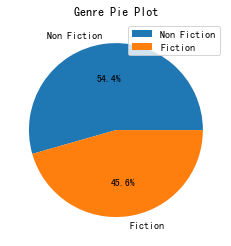

In [8]:
size = [df['Genre'].value_counts()[i] for i in range(2)]
label = df['Genre'].value_counts().index
plt.pie(size,labels=label,autopct='%1.1f%%')
plt.title('Genre Pie Plot')
plt.legend(loc = "best")  
plt.show()

Charts below show the amount of the book and the total reviews each year.

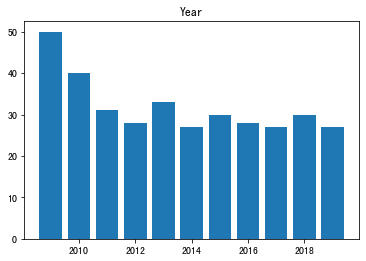

In [9]:
label = df['Year'].value_counts().index
size = [df['Year'].value_counts()[label[i]] for i in range(len(label))]
plt.bar(label,size)
plt.title('Year')
plt.show()

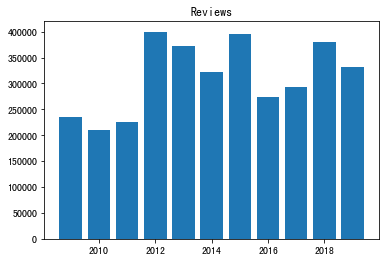

In [10]:
label = df.groupby('Year')['Reviews'].sum().index
size = [df.groupby('Year')['Reviews'].sum()[label[i]] for i in range(len(label))]
plt.bar(label,size)
plt.title('Reviews')
plt.show()

Catergorized the reviews into 3 category, and we can find out that about 50% of the Book get 4.4 ~ 4.7 for it's ranking

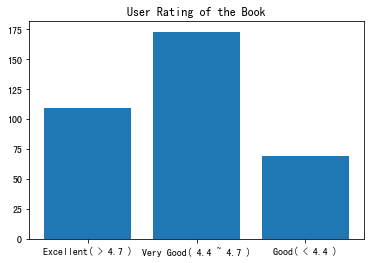

In [11]:
rank = {'Excellent( > 4.7 )':0,'Very Good( 4.4 ~ 4.7 )':0,'Good( < 4.4 )':0}
for i in df['User Rating']:
    if i >4.7:
        rank["Excellent( > 4.7 )"]+=1
    elif i>4.4:
        rank["Very Good( 4.4 ~ 4.7 )"]+=1
    else:
        rank['Good( < 4.4 )']+=1
    key,value = [],[]
for i,j in rank.items():
        key.append(i)
        value.append(j)
plt.bar(key,value)
plt.title('User Rating of the Book')
plt.show()




Charts below show the distribution of reviews and price.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


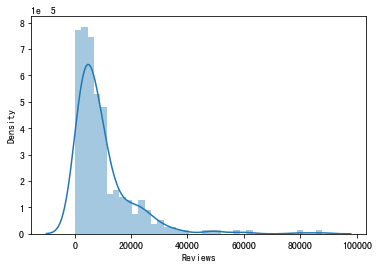

In [12]:
sns.distplot(df['Reviews'])
plt.show()


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


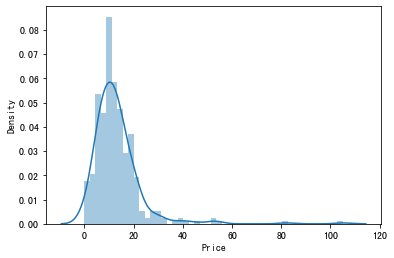

In [13]:
sns.distplot(df['Price'])
plt.show()


Built the leaderboard of the Author

In [14]:
top20 = df.groupby('Author')['User Rating'].count().sort_values(ascending=False).head(20).index.to_list()
leader = df.groupby('Author').mean()[['User Rating','Price']]
leader['Reviews'] = df.groupby('Author').sum()[['Reviews']]
leader['Numbers'] = df.groupby('Author').count()[['User Rating']]
leader = leader[leader.index.isin(top20)]
leader.columns = ['Average User Rating','Average Price', 'Total Reviews', 'Numbers']

In [15]:
leader.sort_values('Numbers',ascending=False)

,Average User Rating,Average Price,Total Reviews,Numbers
Author,,,,
Jeff Kinney,4.800000,9.250000,67482,12
Rick Riordan,4.770000,10.200000,39541,10
J.K. Rowling,4.550000,23.875000,91764,8
Stephenie Meyer,4.657143,19.857143,44058,7
Bill O'Reilly,4.633333,10.666667,54445,6
Dav Pilkey,4.900000,6.666667,44261,6
Suzanne Collins,4.680000,14.200000,130548,5
John Grisham,4.400000,16.200000,60961,5
E L James,4.320000,15.600000,130746,5


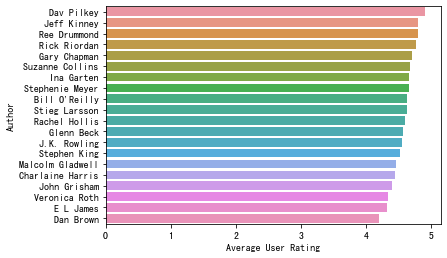

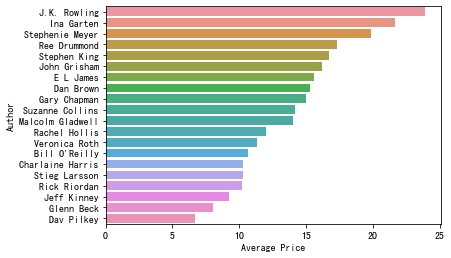

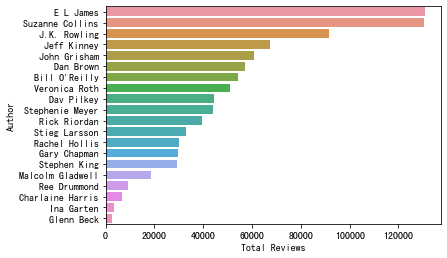

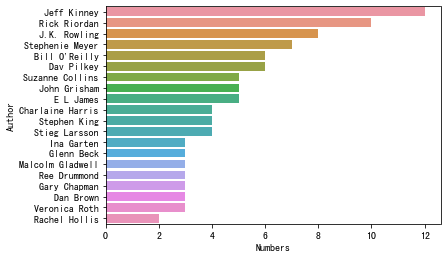

In [16]:
for i in leader.columns:
    check = leader.sort_values(i,ascending=False)
    sns.barplot(x=check[i],y=check.index)
    plt.show()

Deeply analyze the Top 5 Author

In [17]:
leader.sort_values('Numbers',ascending=False).head(5)

,Average User Rating,Average Price,Total Reviews,Numbers
Author,,,,
Jeff Kinney,4.800000,9.250000,67482,12
Rick Riordan,4.770000,10.200000,39541,10
J.K. Rowling,4.550000,23.875000,91764,8
Stephenie Meyer,4.657143,19.857143,44058,7
Bill O'Reilly,4.633333,10.666667,54445,6


Jeff Kinney

1. All the Genre of the book Jeff wrote is Fiction
2. Most of the books are in the "Diary of a Wimpy Kid Book" series.

In [18]:
df[df['Author']=="Jeff Kinney"]

,Name,Author,User Rating,Reviews,Price,Year,Genre
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
72,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.8,3837,15,2009,Fiction
73,Diary of a Wimpy Kid: The Long Haul,Jeff Kinney,4.8,6540,22,2014,Fiction
80,"Dog Days (Diary of a Wimpy Kid, Book 4) (Volum...",Jeff Kinney,4.8,3181,12,2009,Fiction
88,Double Down (Diary of a Wimpy Kid #11),Jeff Kinney,4.8,5118,20,2016,Fiction
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction
435,The Meltdown (Diary of a Wimpy Kid Book 13),Jeff Kinney,4.8,5898,8,2018,Fiction
468,"The Third Wheel (Diary of a Wimpy Kid, Book 7)",Jeff Kinney,4.7,6377,7,2012,Fiction


Rick Riordan

1. All the Genre of the book Jeff wrote is Fiction
2. Most of the books are in the "The Heroes of Olympus" OR "The Kane Chronicles" series.
3. User Rating is pretty high ( Mostly 4.8)

In [19]:
df[df['Author']=="Rick Riordan"]

,Name,Author,User Rating,Reviews,Price,Year,Genre
264,Percy Jackson and the Olympians Paperback Boxe...,Rick Riordan,4.8,548,2,2010,Fiction
343,The Blood of Olympus (The Heroes of Olympus (5)),Rick Riordan,4.8,6600,11,2014,Fiction
406,"The House of Hades (Heroes of Olympus, Book 4)",Rick Riordan,4.8,6982,14,2013,Fiction
418,The Last Olympian (Percy Jackson and the Olymp...,Rick Riordan,4.8,4628,7,2009,Fiction
428,"The Lost Hero (Heroes of Olympus, Book 1)",Rick Riordan,4.8,4506,14,2010,Fiction
432,"The Mark of Athena (Heroes of Olympus, Book 3)",Rick Riordan,4.8,6247,10,2012,Fiction
456,"The Red Pyramid (The Kane Chronicles, Book 1)",Rick Riordan,4.6,2186,12,2010,Fiction
458,"The Serpent's Shadow (The Kane Chronicles, Boo...",Rick Riordan,4.8,2091,12,2012,Fiction
463,"The Son of Neptune (Heroes of Olympus, Book 2)",Rick Riordan,4.8,4290,10,2011,Fiction
469,"The Throne of Fire (The Kane Chronicles, Book 2)",Rick Riordan,4.7,1463,10,2011,Fiction


J.K. Rowling

1. All the Genre of the book Jeff wrote is Fiction
2. Most of the books are in the "Harry Potter" series.
3. Price is pretty high


In [20]:
df[df['Author']=="J.K. Rowling"]

,Name,Author,User Rating,Reviews,Price,Year,Genre
102,Fantastic Beasts and Where to Find Them: The O...,J.K. Rowling,4.7,4370,15,2016,Fiction
153,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,4.9,19622,30,2016,Fiction
154,"Harry Potter and the Cursed Child, Parts 1 & 2...",J.K. Rowling,4.0,23973,12,2016,Fiction
155,Harry Potter and the Goblet of Fire: The Illus...,J.K. Rowling,4.9,7758,18,2019,Fiction
156,Harry Potter and the Prisoner of Azkaban: The ...,J.K. Rowling,4.9,3146,30,2017,Fiction
157,Harry Potter and the Sorcerer's Stone: The Ill...,J.K. Rowling,4.9,10052,22,2016,Fiction
159,Harry Potter Paperback Box Set (Books 1-7),J.K. Rowling,4.8,13471,52,2016,Fiction
353,The Casual Vacancy,J.K. Rowling,3.3,9372,12,2012,Fiction


Stephenie Meyer

1. All the Genre of the book Jeff wrote is Fiction
2. Most of the books are in the "Twilight" series.
3. All the book was written in 2009 or 2010

In [21]:
df[df['Author']=="Stephenie Meyer"]

,Name,Author,User Rating,Reviews,Price,Year,Genre
38,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.6,9769,13,2009,Fiction
95,Eclipse (Twilight Sagas),Stephenie Meyer,4.7,5505,7,2009,Fiction
96,Eclipse (Twilight),Stephenie Meyer,4.7,5505,18,2009,Fiction
241,New Moon (The Twilight Saga),Stephenie Meyer,4.6,5680,10,2009,Fiction
461,The Short Second Life of Bree Tanner: An Eclip...,Stephenie Meyer,4.6,2122,0,2010,Fiction
473,The Twilight Saga Collection,Stephenie Meyer,4.7,3801,82,2009,Fiction
513,"Twilight (The Twilight Saga, Book 1)",Stephenie Meyer,4.7,11676,9,2009,Fiction


Bill O'Reilly

1. All the Genre of the book Jeff wrote is Non Fiction (Also the only person who wrote Non Fiction of Top 5 Author)
2. Most of the books are in the "Killing " series.


In [22]:
df[df['Author']=="Bill O'Reilly"]

,Name,Author,User Rating,Reviews,Price,Year,Genre
196,Killing Jesus (Bill O'Reilly's Killing Series),Bill O'Reilly,4.5,11391,12,2013,Non Fiction
197,Killing Kennedy: The End of Camelot,Bill O'Reilly,4.6,8634,25,2012,Non Fiction
198,Killing Lincoln: The Shocking Assassination th...,Bill O'Reilly,4.7,9342,10,2011,Non Fiction
200,Killing Patton: The Strange Death of World War...,Bill O'Reilly,4.6,10927,6,2014,Non Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction
202,Killing the Rising Sun: How America Vanquished...,Bill O'Reilly,4.8,8916,6,2016,Non Fiction
